In [39]:
import env 
import acquire
import prepare
import model
import split_scale
from sklearn.preprocessing import LabelEncoder

In [22]:
import seaborn as sns
import pandas as pd
import numpy as np

In [90]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
#sns.set(style="darkgrid")

In [107]:
monthly_df = acquire.get_month2month()

In [108]:
monthly_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0135-NMXAP,Female,0,No,No,12,Yes,Yes,2,No,...,No,No,Yes,No,1,Yes,3,89.75,1052.4,Yes
1,0208-BPQEJ,Female,0,Yes,Yes,12,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,3,19.40,198.1,No
2,0282-NVSJS,Female,1,Yes,Yes,12,No,No phone service,1,No,...,No,Yes,No,No,1,Yes,2,29.30,355.9,No
3,0547-HURJB,Male,0,No,Yes,12,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,4,21.05,235.8,No
4,0603-OLQDC,Male,0,No,Yes,12,Yes,No,1,Yes,...,No,No,Yes,Yes,1,Yes,2,69.85,837.5,No


In [ ]:
annual_df = acquire.get_1year()

In [113]:
(monthly_df['churn'] == 'Yes').sum()

33

In [114]:
monthly_df.shape

(86, 21)

In [116]:
1-33/86

0.6162790697674418

In [117]:
(annual_df['churn'] == 'Yes').sum()

5

In [119]:
annual_df.shape

(22, 21)

In [120]:
1-5/22

0.7727272727272727

# Plotting

In [103]:
both = pd.concat([monthly_df, annual_df])

Text(0.5, 0, 'Contract Type')

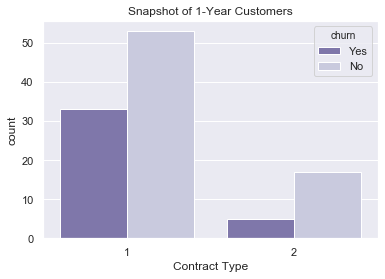

In [104]:
ax = sns.countplot(x='contract_type_id', data=both, hue='churn', palette="Purples_r")
ax.set_title("Snapshot of 1-Year Customers")
plt.xlabel("Contract Type")

In [ ]:
y_True = df["churn"][df["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

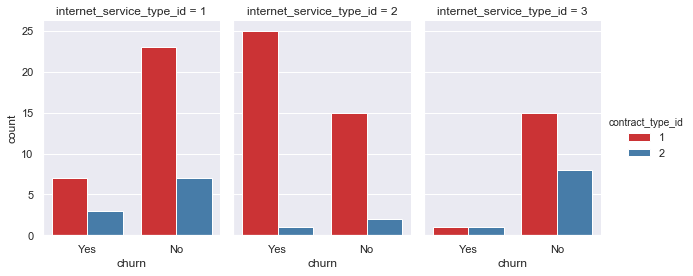

In [105]:
g = sns.catplot(x="churn", hue="contract_type_id", col="internet_service_type_id", data=both, kind="count", height=4, aspect=.7, palette="Set1");

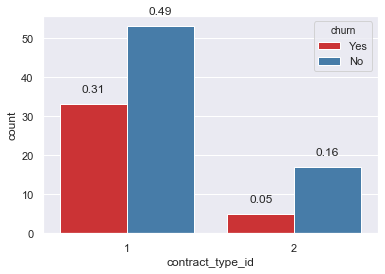

In [32]:
total = float(len(both)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="contract_type_id", hue="churn", data=both, palette="Set1") # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
show()

# QUESTION: price threshold for specific services where the likelihood of churn increases

In [34]:
telco = prepare.prep_telco()

In [35]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
internet_service_type_id    7043 non-null int64
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
contract_type_id            7043 non-null int64
paperless_billing           7043 non-null object
payment_type_id             7043 non-null int64
monthly_charges             7043 non-null float64
total

In [36]:
def encode_variable(column, df):
    lab_enc = LabelEncoder()
    lab_enc.fit(df[column])
    df[column] = lab_enc.transform(df[column])

In [41]:
cat_cols = telco.select_dtypes('object').columns
for i in cat_cols:
    encode_variable(i, telco)

In [130]:
(telco['churn']).sum()

1869

In [124]:
# blob = telco[['tenure', 'monthly_charges']]
blob = telco['monthly_charges']

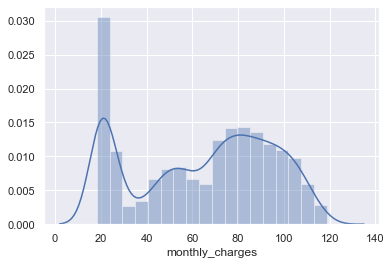

In [127]:
sns.distplot(blob);

''

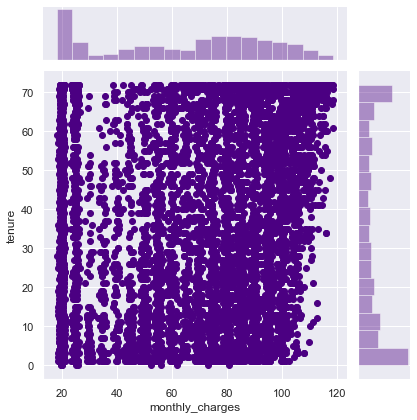

In [145]:
sns.jointplot(x="monthly_charges", y="tenure", data=telco, color='Indigo')
;

# QUESTION: Feature with highest churn rate